<a href="https://colab.research.google.com/github/jordestay/public/blob/main/Blackjack_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gym

# Gym Environment

In [ ]:
# https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py
environment = gym.make(
    "Blackjack-v1",   # environment name
    natural=True,     # flag to payout 1.5x on a "natural" blackjack win
    new_step_api=True # avoids warnings and allows future compatibility
)

# Agent

In [ ]:
class Agent(object):
    def __init__(self):
        self.value_table = np.zeros(shape=(32, 11, 2))

    def act(self, observation):
        if observation[1] >= 9:
            if observation[0] >= 16:
                return 0
            else:
                return 1

        else:
            if observation[0] >= 12:
                return 0
            else:
                return 1

# Play one simulation with our agent

In [ ]:
agent = Agent()
done = False

# done flag gets set to true/false from the environment's `step`
state = environment.reset()
while not done:
    action = agent.act(state)
    next_state, reward, done, _, _ = environment.step(action)

    agent.value_table[next_state] += reward

    state = next_state


print(f"Our hand sum: {state[0]}")
print(f"Our score: {reward}")

Our hand sum: 21
Our score: 1.0


# Play multiple simulations with our agent

In [ ]:
# Start with variables that should persist between simulations
agent = Agent()
total_wins = 0
total_losses = 0

average_reward = 0
average_rewards = []

# Loop for N simulations
for iteration in range(1, 10_000):

    # Remember to reset the environment!
    state = environment.reset()
    done = False

    # Play until the environment/simulation is complete
    while not done:
        action = agent.act(state)
        next_state, reward, done, _, _ = environment.step(action)

        agent.value_table[state] += (reward - agent.value_table[state]) * 0.001

        state = next_state

    # Metric logging
    if reward == -1.0:
        total_losses += 1
    else:
        total_wins += 1

    average_reward *= iteration
    average_reward += reward
    average_reward /= iteration

    average_rewards.append(average_reward)

# Metric printing and plotting

In [ ]:
print(f"Total Wins: {total_wins}")
print(f"Total Losses: {total_losses}")

Total Wins: 4894
Total Losses: 5105


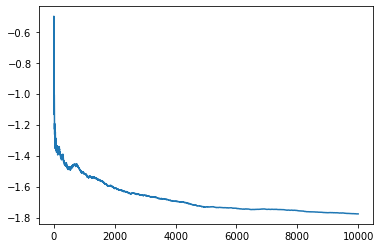

In [ ]:
plt.plot([x for x in range(9999)], average_rewards)
plt.show()

Text(0.5, 1.0, 'No usable ace')

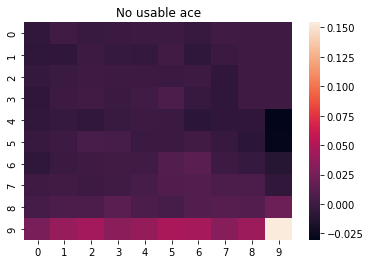

In [ ]:
sns.heatmap(agent.value_table[12:22, 1:, 0])
plt.title("No usable ace")

Text(0.5, 1.0, 'Usable ace')

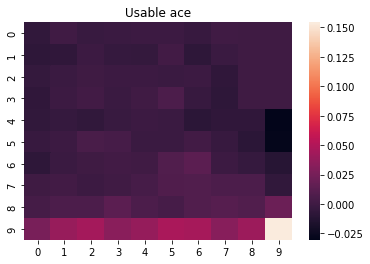

In [ ]:
sns.heatmap(agent.value_table[12:22, 1:, 1])
plt.title("Usable ace")